In [181]:
import pandas as pd
from math import sqrt
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime 
from pandas import Series
%matpllotlib inline
import warnings
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

UsageError: Line magic function `%matpllotlib` not found.


In [77]:
data = pdr.get_data_yahoo('RELIANCE.NS', datetime.date.today() - datetime.timedelta(1095),datetime.date.today() - datetime.timedelta(15))

In [78]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-17,779.799988,768.500000,768.500000,775.875000,8571618.0,764.088074
2017-07-18,775.900024,755.500000,773.400024,759.950012,8978824.0,748.405029
2017-07-19,769.000000,756.299988,756.299988,766.474976,5390082.0,754.830872
2017-07-20,775.000000,761.849976,769.875000,764.450012,6229372.0,752.836670
2017-07-21,795.849976,772.474976,775.000000,792.500000,44410224.0,780.460571
...,...,...,...,...,...,...
2020-06-24,1772.699951,1711.699951,1735.900024,1727.849976,23807033.0,1721.386475
2020-06-25,1749.000000,1713.050049,1727.000000,1717.900024,18312025.0,1711.473755
2020-06-26,1752.000000,1717.000000,1728.800049,1741.650024,14270458.0,1735.134888


In [106]:
data.index

DatetimeIndex(['2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26',
               '2017-07-27', '2017-07-28',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=725, freq=None)

In [82]:
data.shape

(725, 6)

In [83]:
train = data['Adj Close'].iloc[:710]

In [84]:
train.tail()

Date
2020-06-03    1535.883057
2020-06-04    1573.890381
2020-06-05    1575.783203
2020-06-08    1563.628784
2020-06-09    1531.399902
Name: Adj Close, dtype: float64

In [85]:
valid = data['Adj Close'].iloc[695:]

In [86]:
valid.tail()

Date
2020-06-24    1721.386475
2020-06-25    1711.473755
2020-06-26    1735.134888
2020-06-29    1716.704102
2020-06-30    1697.725342
Name: Adj Close, dtype: float64

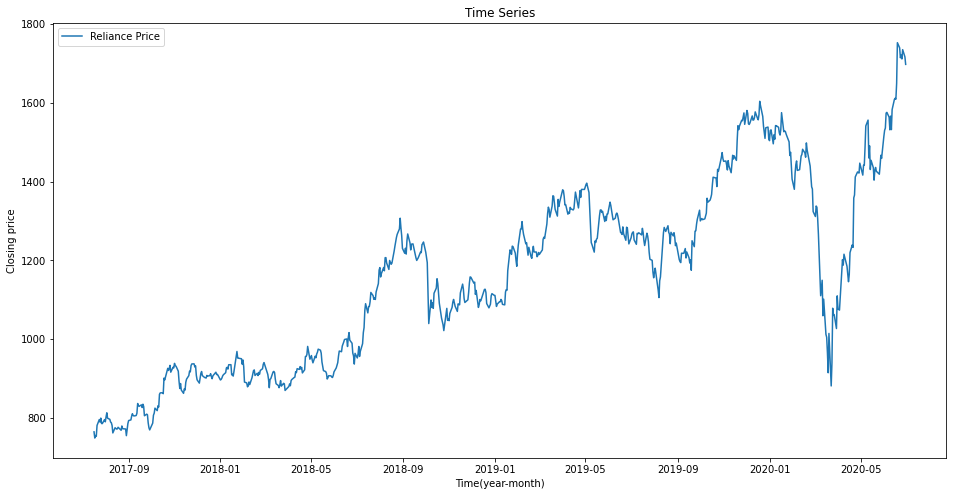

In [87]:
ts = data['Adj Close'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Reliance Price') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Closing price") 
plt.legend(loc='best')

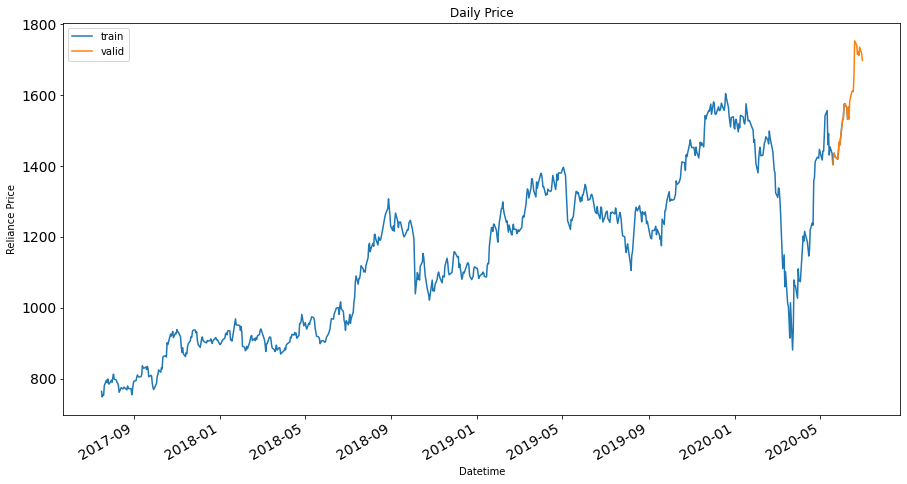

In [88]:
train.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='train')
valid.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Reliance Price") 
plt.legend(loc='best') 
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(10).mean() # 24 hours on each day
    rolstd = timeseries.rolling(10).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    #     print(dftest)
#{'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
#         print('Critical Value (%s): ' %key, value)
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

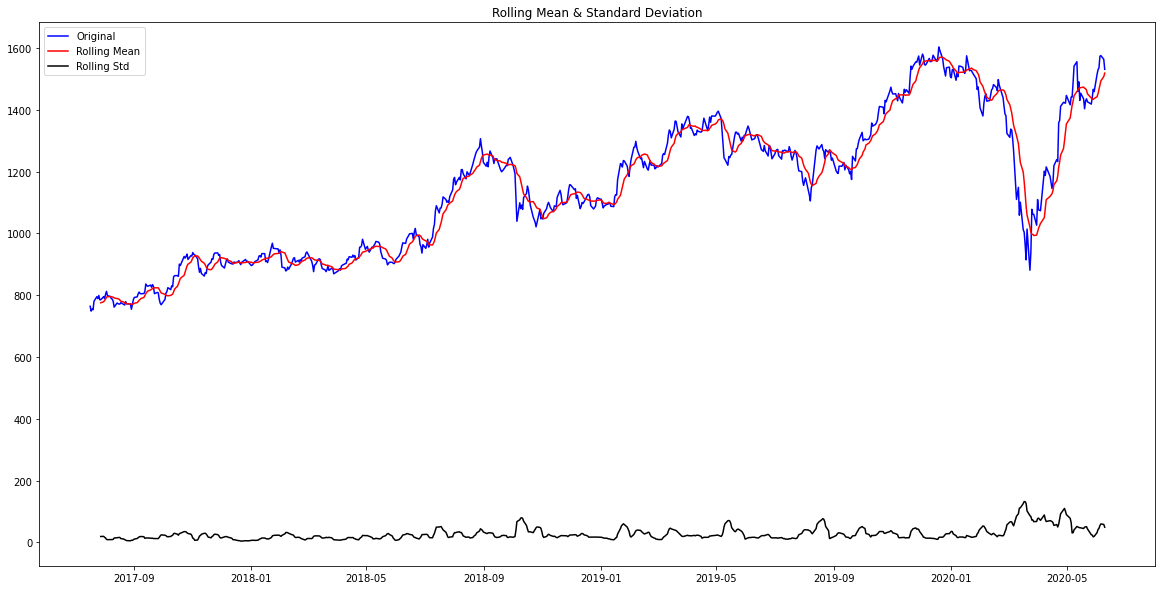

Results of Dickey-Fuller Test:
Test Statistic                  -1.540471
p-value                          0.513404
#Lags Used                      11.000000
Number of Observations Used    698.000000
Critical Value (1%)             -3.439753
Critical Value (5%)             -2.865690
Critical Value (10%)            -2.568980
dtype: float64


In [90]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train)

As we can see that test statistic is greater than critical values, therefore the value is not static yet.

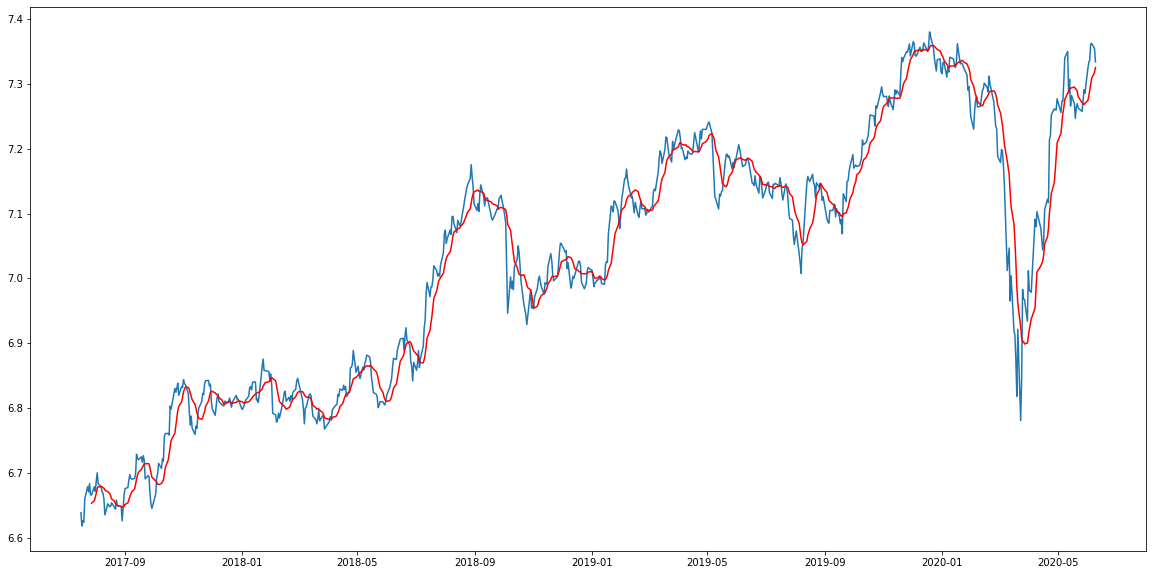

In [91]:
Train_log = np.log(train) 
valid_log = np.log(valid)
moving_avg = Train_log.rolling(10).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 

plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.show()

In [92]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff

Date
2017-07-17         NaN
2017-07-18         NaN
2017-07-19         NaN
2017-07-20         NaN
2017-07-21         NaN
                ...   
2020-06-03    0.047299
2020-06-04    0.062040
2020-06-05    0.053943
2020-06-08    0.037000
2020-06-09    0.008531
Name: Adj Close, Length: 710, dtype: float64

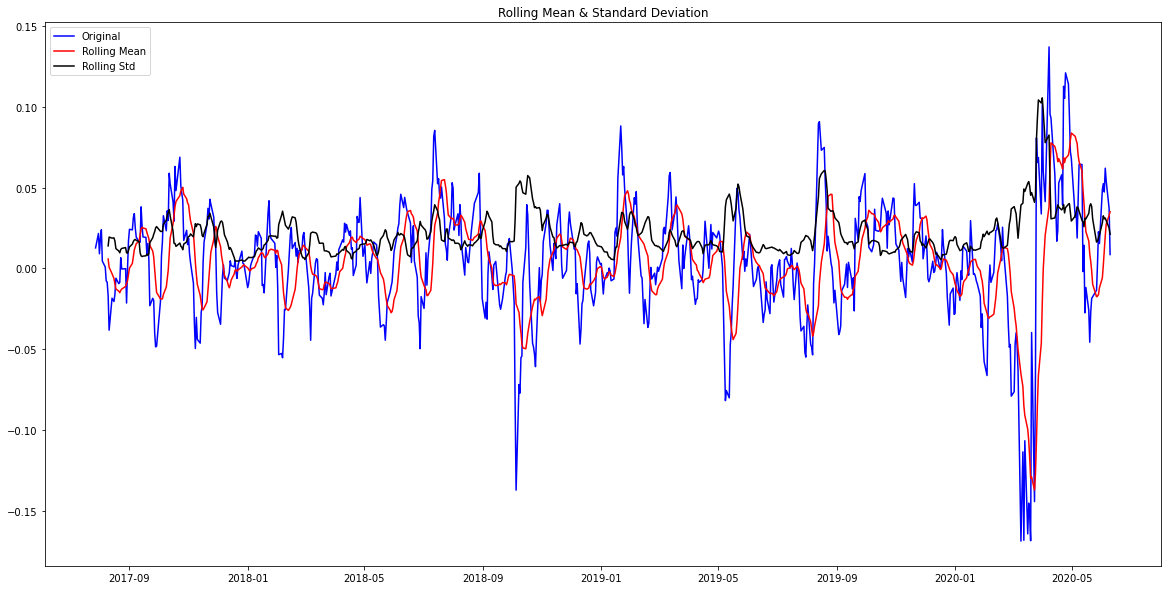

Results of Dickey-Fuller Test:
Test Statistic                -6.350255e+00
p-value                        2.621565e-08
#Lags Used                     1.100000e+01
Number of Observations Used    6.890000e+02
Critical Value (1%)           -3.439877e+00
Critical Value (5%)           -2.865744e+00
Critical Value (10%)          -2.569009e+00
dtype: float64


In [93]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

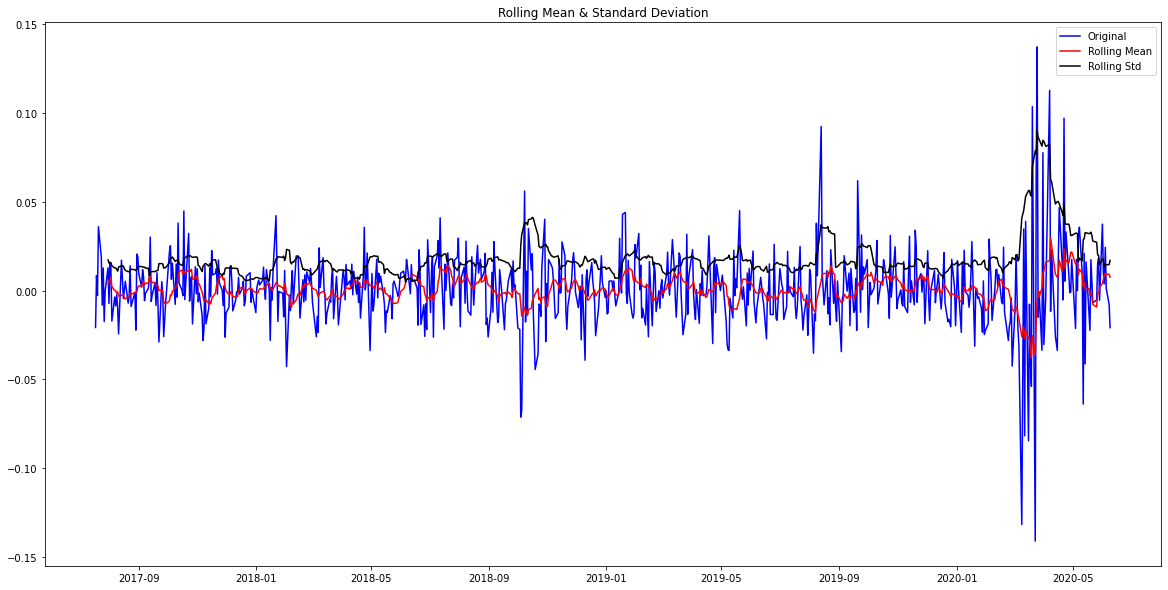

Results of Dickey-Fuller Test:
Test Statistic                -7.945876e+00
p-value                        3.221164e-12
#Lags Used                     1.000000e+01
Number of Observations Used    6.980000e+02
Critical Value (1%)           -3.439753e+00
Critical Value (5%)           -2.865690e+00
Critical Value (10%)          -2.568980e+00
dtype: float64


In [94]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).values, freq = 10) 

In [96]:
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

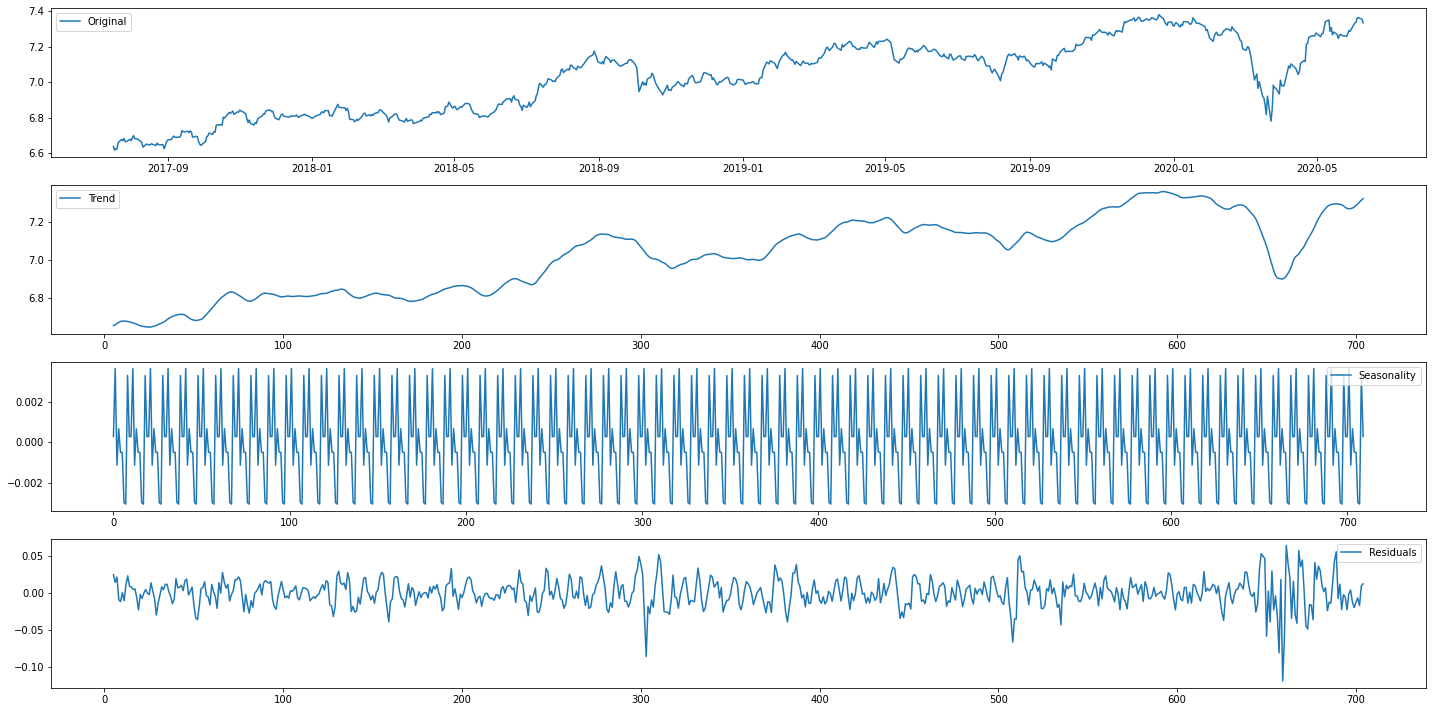

In [97]:
plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

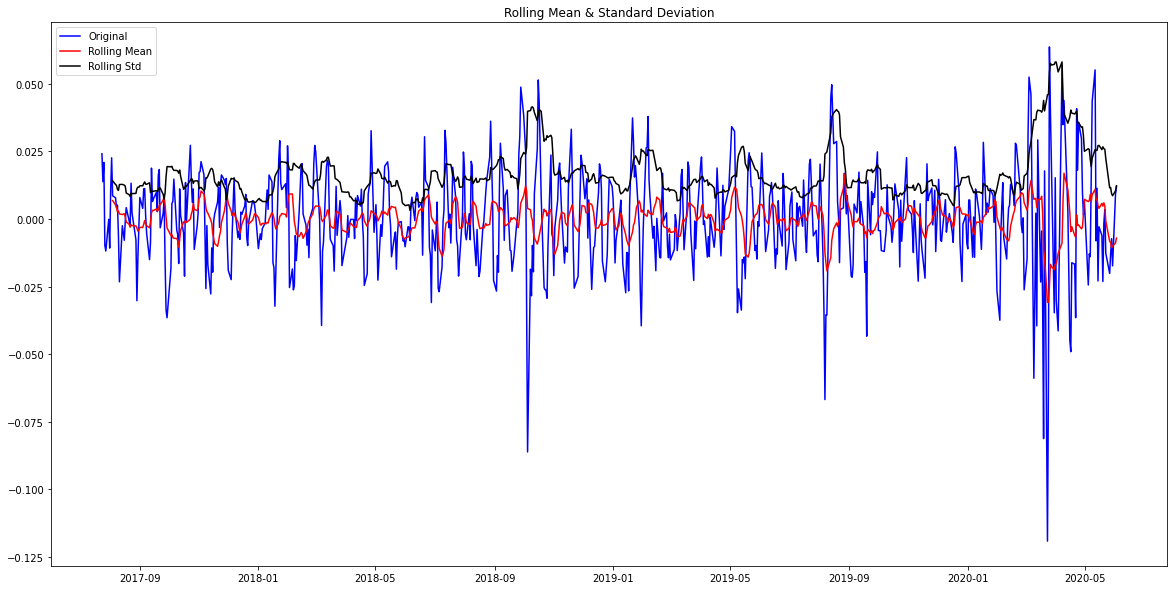

Results of Dickey-Fuller Test:
Test Statistic                -8.976118e+00
p-value                        7.524141e-15
#Lags Used                     2.000000e+01
Number of Observations Used    6.790000e+02
Critical Value (1%)           -3.440017e+00
Critical Value (5%)           -2.865806e+00
Critical Value (10%)          -2.569042e+00
dtype: float64


In [98]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [204]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

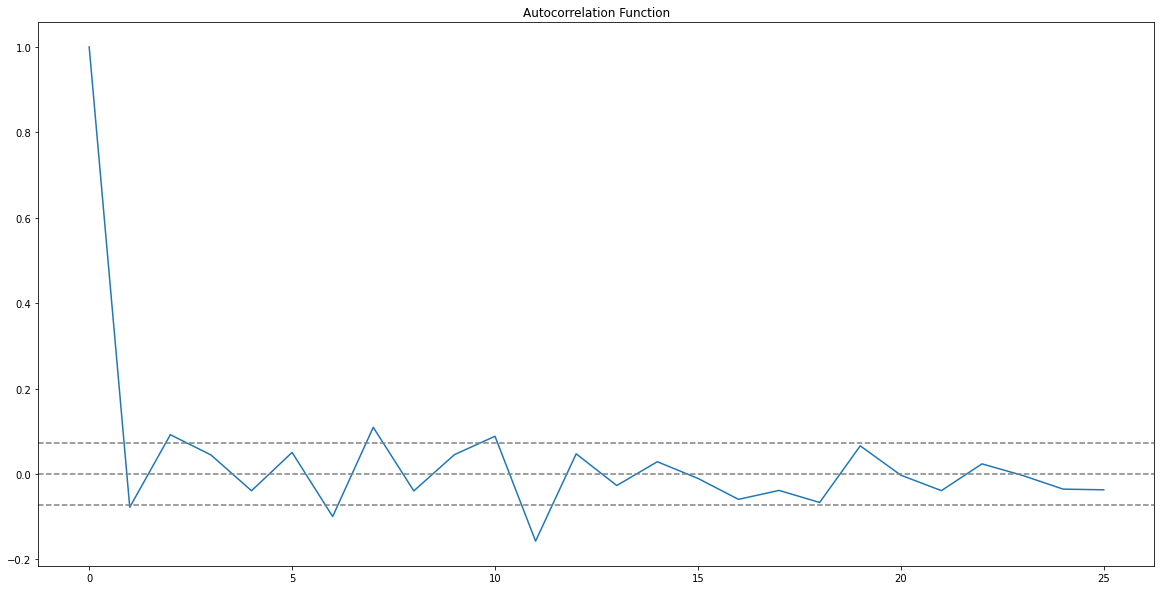

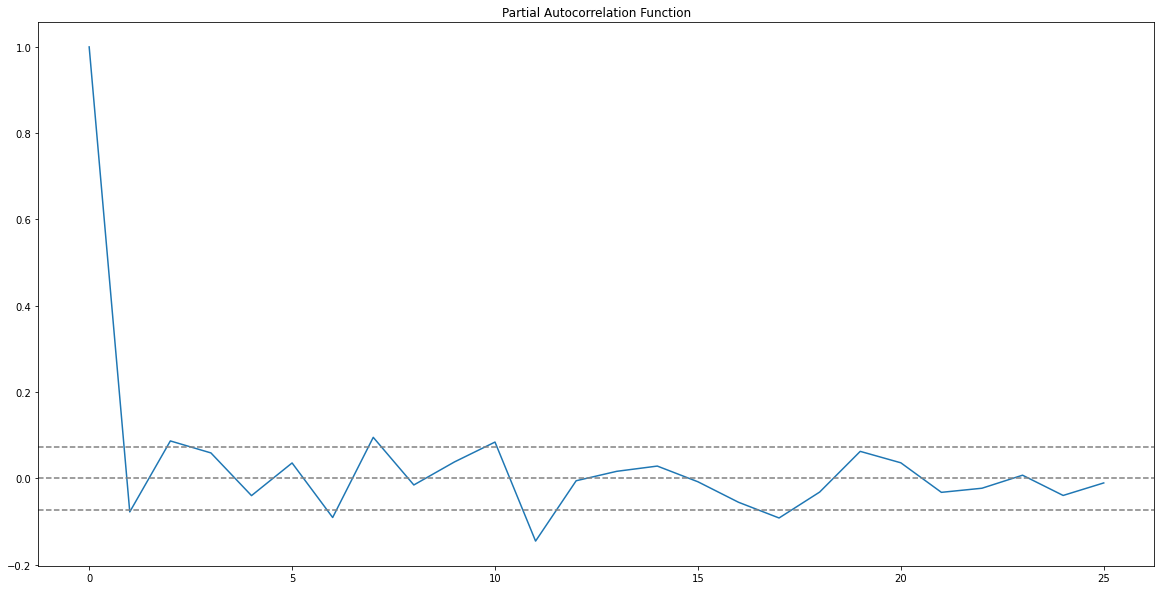

In [209]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


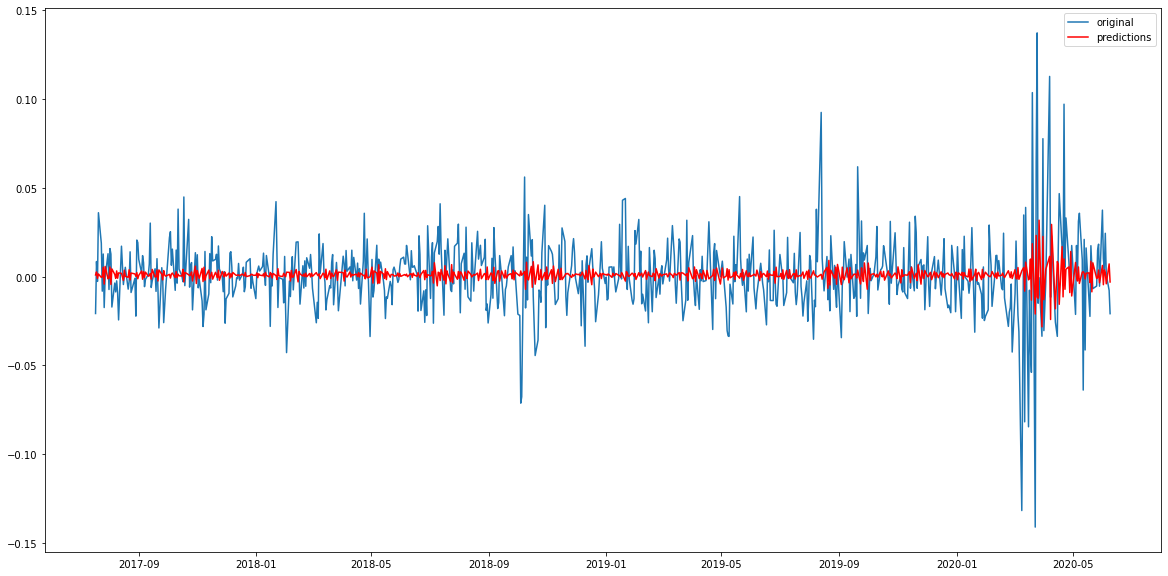

In [232]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(3, 1, 2))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

In [225]:
results_AR = model.fit(disp=-1)  
results_AR

In [226]:
# AR_predict=results_AR.predict()
# AR_predict=AR_predict.cumsum().shift().fillna(0)
# AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid)[0], index = valid.index) 
# AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
# AR_predict = np.exp(AR_predict1)
# plt.plot(valid, label = "Valid") 
# plt.plot(AR_predict, color = 'red', label = "Predict") 
# plt.legend(loc= 'best') 
# plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid))/valid.shape[0])) 
# plt.show()

In [233]:
model = ARIMA(train, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  709
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3253.442
Method:                       css-mle   S.D. of innovations             23.793
Date:                Fri, 17 Jul 2020   AIC                           6520.885
Time:                        21:51:42   BIC                           6552.832
Sample:                             1   HQIC                          6533.227
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0873      0.895      1.215      0.225      -0.667       2.842
ar.L1.D.Adj Close    -1.5037      0.051    -29.559      0.000      -1.603      -1.404
ar.L2.D.Adj Close    -0.

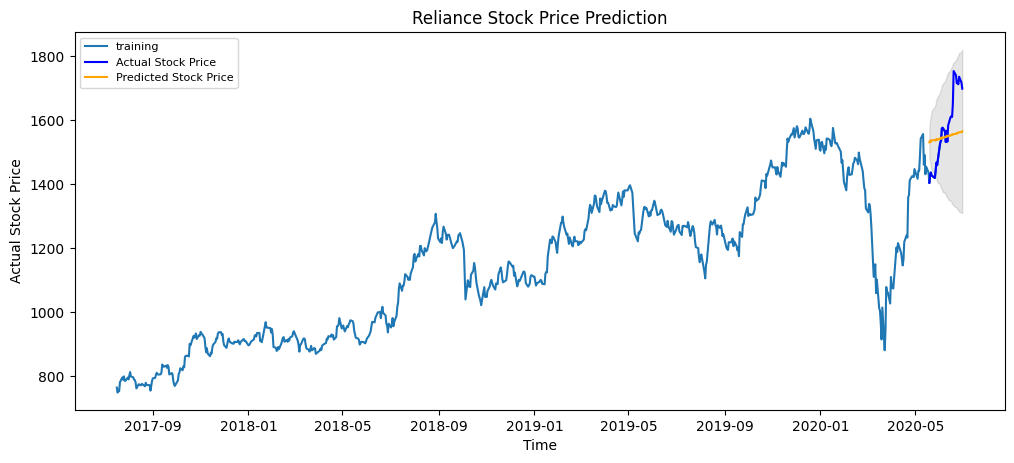

In [234]:
fc, se, conf = fitted.forecast(30, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=valid.index)
lower_series = pd.Series(conf[:, 0], index=valid.index)
upper_series = pd.Series(conf[:, 1], index=valid.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [235]:
from math import sqrt
import math
from sklearn.metrics import mean_absolute_error
# report performance
mse = mean_squared_error(valid, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(valid, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(valid, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - valid)/np.abs(valid))
print('MAPE: '+str(mape))

MSE: 10838.23960071359
MAE: 86.4736138206416
RMSE: 104.10686625152825
MAPE: 0.054089124451717575


In [236]:
from math import sqrt
from sklearn.metrics import mean_squared_error


In [237]:
rms = sqrt(mean_squared_error(valid,fc))
print("RMSE: ", rms)

RMSE:  104.10686625152825
